# Longest Common SubSequence 

In [1]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd

import sys

#### RECURSION 

In [2]:
def lcs_recursive(X, Y, m, n):
    def helper(m, n, calls):
        if m == 0 or n == 0:
            return 0, calls, 1
        calls += 1
        if X[m - 1] == Y[n - 1]:
            result, calls, dp_entries = helper(m - 1, n - 1, calls)
            return 1 + result, calls, dp_entries
        else:
            left_result, calls, dp_entries1 = helper(m, n - 1, calls)
            right_result, calls, dp_entries2 = helper(m - 1, n, calls)
            dp_entries = dp_entries1 + dp_entries2 + 1
            return max(left_result, right_result), calls, dp_entries

    result, calls, dp_entries = helper(m, n, 0)
    return result, calls, dp_entries

#### Top Down Using Memoization

In [3]:
def lcs_memoization(X, Y, m, n):
    memo = [[-1 for _ in range(n + 1)] for _ in range(m + 1)]
    
    def helper(m, n, calls):
        if m == 0 or n == 0:
            return 0, calls, 1
        calls += 1
        if memo[m][n] != -1:
            return memo[m][n], calls, 1
        if X[m - 1] == Y[n - 1]:
            result, calls, dp_entries = helper(m - 1, n - 1, calls)
            memo[m][n] = 1 + result
            return memo[m][n], calls, dp_entries
        else:
            left_result, calls, dp_entries1 = helper(m, n - 1, calls)
            right_result, calls, dp_entries2 = helper(m - 1, n, calls)
            dp_entries = dp_entries1 + dp_entries2 + 1
            memo[m][n] = max(left_result, right_result)
            return memo[m][n], calls, dp_entries

    result, calls, dp_entries = helper(m, n, 0)
    return result, calls, dp_entries

#### Bottom Up Approuch

In [4]:

def lcs_bottom_up(X, Y, m, n):
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    dp_entries = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            dp_entries += 1
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = 1 + dp[i - 1][j - 1]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n], dp_entries

In [14]:
# data_sizes = [10, 20, 30, 40, 50]

# for n in data_sizes:
#     dimensions = [10] * n  # Adjust the dimensions as needed
#     print(f"Data Size: {n}")
    
#     # Recursive Algorithm
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_recursive(dimensions, 1, n-1)
#     end_time = time.perf_counter()
#     print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
    
#     # Recursive with Memoization
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_memoization(dimensions)
#     end_time = time.perf_counter()
#     print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    
#     # Bottom-Up DP
#     start_time = time.perf_counter()
#     result, calls = matrix_chain_bottom_up(dimensions)
#     end_time = time.perf_counter()
#     print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")


Data Size: 10
Recursive Algorithm - Time: 0.0029990673065185547, Calls: 9841
Memoization - Time: 0.0, Calls: 241
Bottom-Up DP - Time: 0.0, DP Table Entries: 120

Data Size: 20
Recursive Algorithm - Time: 110.45915484428406, Calls: 581130733
Memoization - Time: 0.001010894775390625, Calls: 2281
Bottom-Up DP - Time: 0.0, DP Table Entries: 1140

In [11]:
import time
import random

def analyze_lcs_algorithms(data_sizes):
    execution_times_recursive = []
    execution_times_memoization = []
    execution_times_bottom_up = []
    total_calls_recursive = []
    total_calls_memoization = []
    total_calls_bottom_up = []
    total_dp_entries_recursive = []
    total_dp_entries_memoization = []
    total_dp_entries_bottom_up = []

    for n in data_sizes:
        X = [random.randint(1, 100) for i in range(n)]
        Y = [random.randint(1, 100) for i in range(n)]
        print(f"Data Size: {n}")

        # Recursive Algorithm
        start_time = time.perf_counter()
        result, calls, dp_entries = lcs_recursive(X, Y, len(X), len(Y))
        end_time = time.perf_counter()
        print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_recursive.append(end_time - start_time)
        total_calls_recursive.append(calls)
        total_dp_entries_recursive.append(dp_entries)

        # Recursive with Memoization
        start_time = time.perf_counter()
        result, calls, dp_entries = lcs_memoization(X, Y, len(X), len(Y))
        end_time = time.perf_counter()
        print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}, DP Entries: {dp_entries}")
        execution_times_memoization.append(end_time - start_time)
        total_calls_memoization.append(calls)
        total_calls_bottom_up.append(calls)
        total_dp_entries_memoization.append(dp_entries)

        # Bottom-Up DP
        start_time = time.perf_counter()
        result, dp_entries = lcs_bottom_up(X, Y, len(X), len(Y))
        end_time = time.perf_counter()
        print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Entries: {dp_entries}\n")
        execution_times_bottom_up.append(end_time - start_time)
        total_dp_entries_bottom_up.append(dp_entries)

    return (execution_times_recursive, execution_times_memoization, execution_times_bottom_up,
            total_calls_recursive, total_calls_memoization, total_calls_bottom_up,
            total_dp_entries_recursive, total_dp_entries_memoization, total_dp_entries_bottom_up)

data_sizes = [5, 7, 9, 11, 13, 15]
results = analyze_lcs_algorithms(data_sizes)

execution_times_recursive, execution_times_memoization, execution_times_bottom_up, \
total_calls_recursive, total_calls_memoization, total_calls_bottom_up, \
total_dp_entries_recursive, total_dp_entries_memoization, total_dp_entries_bottom_up = results

# You can use these lists for further analysis or visualization.


Data Size: 5
Recursive Algorithm - Time: 0.0001145999995060265, Calls: 251, DP Entries: 503
Memoization - Time: 2.260000110254623e-05, Calls: 41, DP Entries: 51
Bottom-Up DP - Time: 1.2600001355167478e-05, DP Entries: 25

Data Size: 7
Recursive Algorithm - Time: 0.0012373999998089857, Calls: 3121, DP Entries: 6233
Memoization - Time: 3.139999898849055e-05, Calls: 84, DP Entries: 97
Bottom-Up DP - Time: 1.6000001778593287e-05, DP Entries: 49

Data Size: 9
Recursive Algorithm - Time: 0.019894500001100823, Calls: 48619, DP Entries: 97239
Memoization - Time: 5.7600002037361264e-05, Calls: 145, DP Entries: 163
Bottom-Up DP - Time: 2.7000001864507794e-05, DP Entries: 81

Data Size: 11
Recursive Algorithm - Time: 0.2746917000004032, Calls: 673135, DP Entries: 1330255
Memoization - Time: 7.26000034774188e-05, Calls: 219, DP Entries: 239
Bottom-Up DP - Time: 3.389999983482994e-05, DP Entries: 121

Data Size: 13
Recursive Algorithm - Time: 3.7985421999983373, Calls: 9671871, DP Entries: 19327727

In [9]:
data1 = list()
data_sizes= np.array(data_sizes)
for i in range(len(execution_times_bottom_up)):
    data1.append([execution_times_recursive[i],execution_times_memoization[i],execution_times_bottom_up[i]])
df = pd.DataFrame(data1,columns=['execution_times_recursive','execution_times_memoization','execution_times_bottom_up'])
df.set_index(data_sizes,inplace=True)
df

,execution_times_recursive,execution_times_memoization,execution_times_bottom_up
5,0.000157,0.000035,0.000263
7,0.002008,0.000059,0.000024
9,0.020751,0.000085,0.000037
11,0.205126,0.000130,0.000057
13,4.729130,0.000167,0.000071
15,49.934688,0.000149,0.000065


In [12]:
data2 = list()
data_sizes= np.array(data_sizes)
for i in range(len(total_calls_recursive)):
    data2.append([total_calls_recursive[i],total_calls_memoization[i],total_calls_bottom_up[i]])
df = pd.DataFrame(data2,columns=['total_calls_recursive','total_calls_memoization','total_calls_bottom_up'])
df.set_index(data_sizes,inplace=True)
df



,total_calls_recursive,total_calls_memoization,total_calls_bottom_up
5,251,41,41
7,3121,84,84
9,48619,145,145
11,673135,219,219
13,9671871,312,312
15,113618901,398,398


In [13]:
data3 = list()
data_sizes= np.array(data_sizes)
for i in range(len(total_calls_recursive)):
    data3.append([total_dp_entries_recursive[i],total_dp_entries_memoization[i],total_dp_entries_bottom_up[i]])
df = pd.DataFrame(data3,columns=['total_dp_recursive','total_dp_memoization','total_dp_bottom_up'])
df.set_index(data_sizes,inplace=True)
df

,total_dp_recursive,total_dp_memoization,total_dp_bottom_up
5,503,51,25
7,6233,97,49
9,97239,163,81
11,1330255,239,121
13,19327727,337,169
15,227192195,425,225


In [14]:
total_dp_entries_bottom_up

[25, 49, 81, 121, 169, 225]

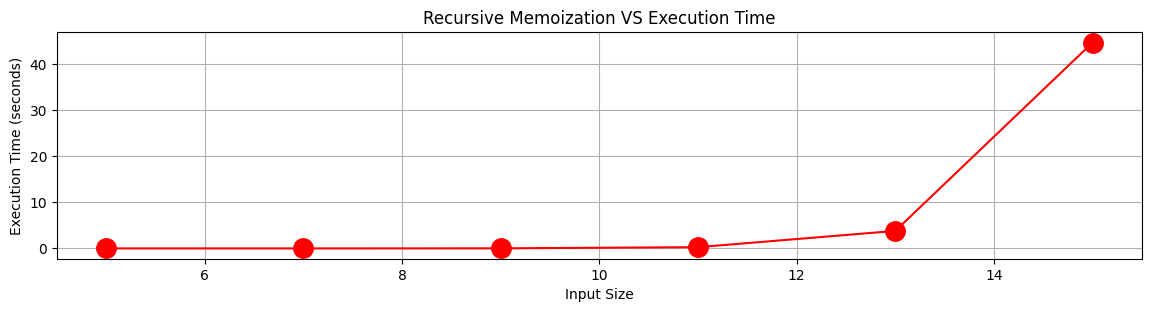

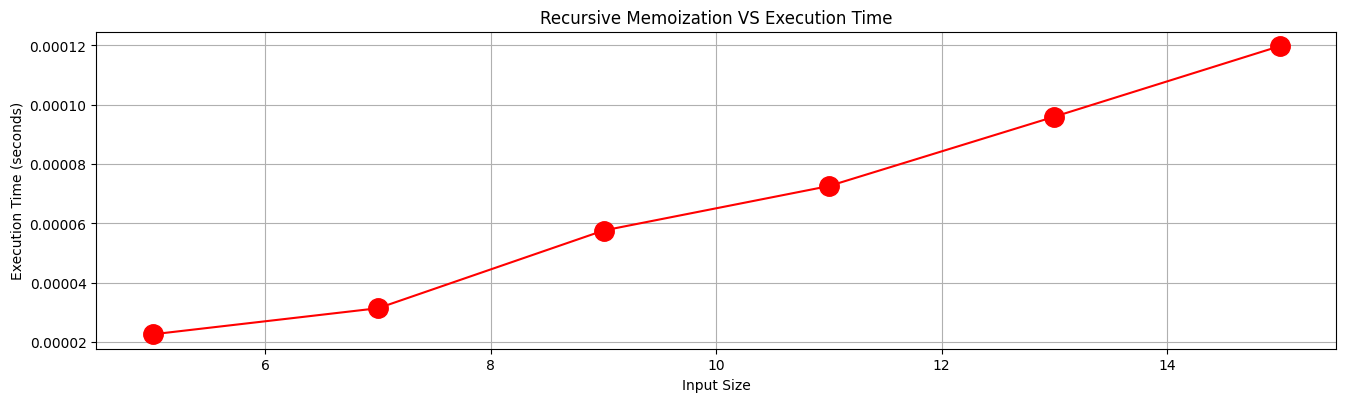

In [15]:
plt.figure(figsize=(14,10))
plt.subplot(3, 1, 1)
plt.plot(data_sizes,execution_times_recursive, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(16,14))
plt.subplot(3, 1, 2)
plt.plot(data_sizes,  execution_times_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()


    


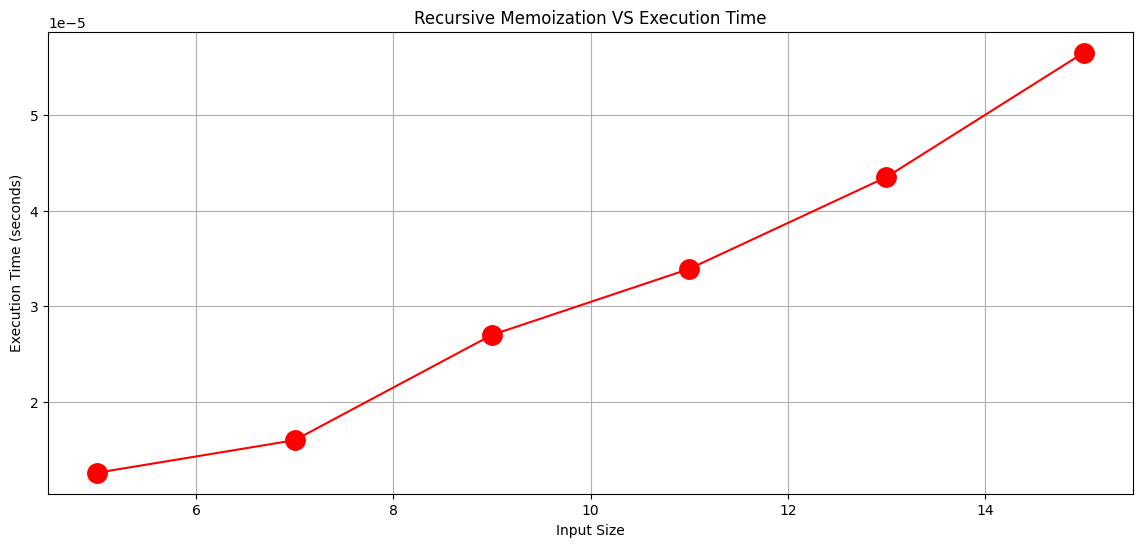

In [16]:

plt.figure(figsize=(14,6))
plt.plot(data_sizes, execution_times_bottom_up, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

CALLS vs Problem

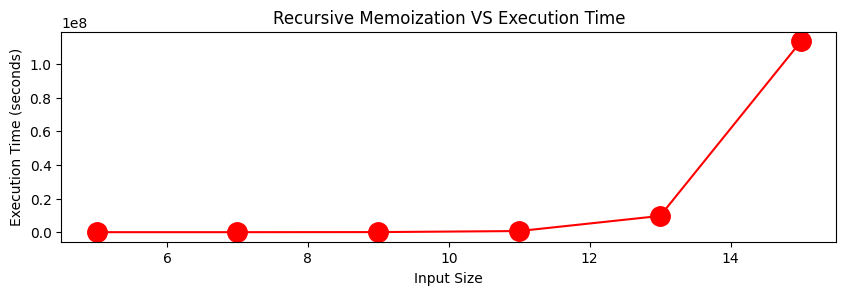

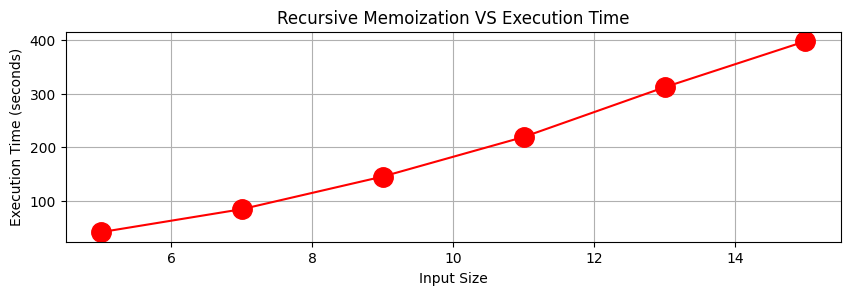

In [17]:

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sizes, total_calls_recursive, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')


plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.plot(data_sizes, total_calls_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()


    

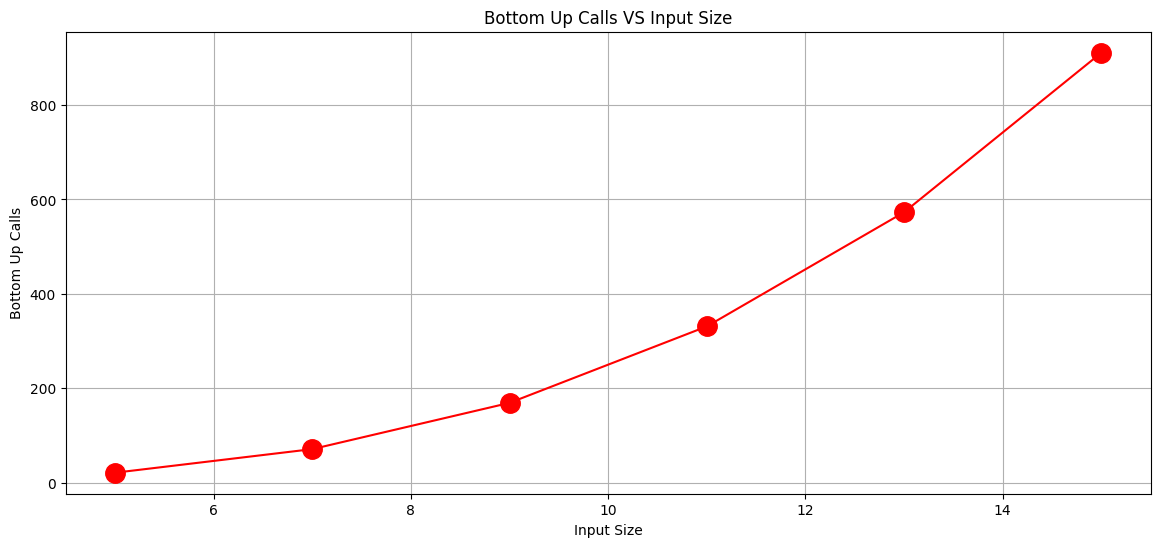

In [62]:
plt.figure(figsize=(14,6))
plt.plot(data_sizes, total_calls_bottom_up, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Bottom Up Calls')
plt.title('Bottom Up Calls VS Input Size')
plt.grid(True)
plt.show()

DP ENTRIES:

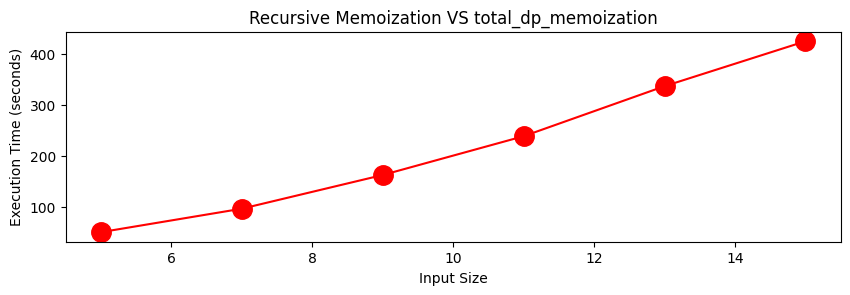

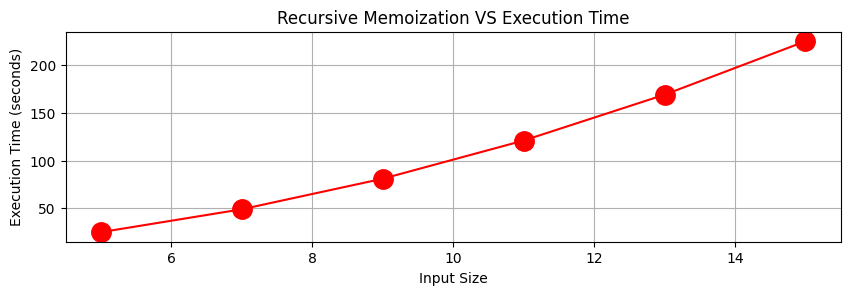

In [19]:

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data_sizes,  total_dp_entries_memoization, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS total_dp_memoization')

 
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
plt.plot(data_sizes,  total_dp_entries_bottom_up, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Recursive Memoization VS Execution Time')
plt.grid(True)
plt.show()

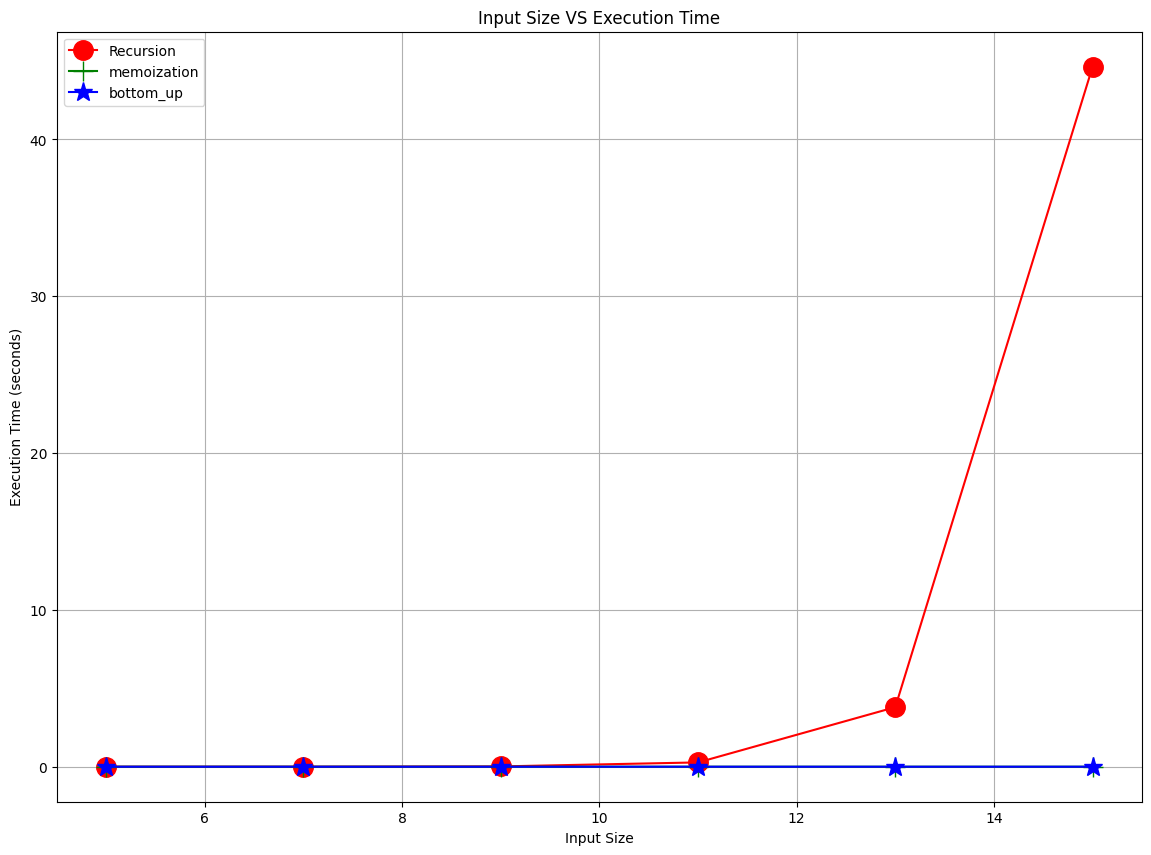

In [20]:
plt.figure(figsize=(14,10))
 
plt.plot(data_sizes,execution_times_recursive, marker='o',color='r',markersize=14,label='Recursion')
plt.plot(data_sizes,  execution_times_memoization, marker='+',color='g',markersize=14,label='memoization')
plt.plot(data_sizes, execution_times_bottom_up, marker='*',color='b',markersize=14,label='bottom_up')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Input Size VS Execution Time')
plt.grid(True)
plt.legend()

plt.show()

 

In [67]:
arrtest = [5,10,25,50,100,250,500,1000]

import random

testcase=[]
for i in range(len(arrtest)):
    testcase.append([random.randint(1,100) for i in range(arrtest[i])])

for i in testcase:
    print(i)

[5, 76, 65, 17, 40]
[39, 63, 24, 61, 2, 75, 13, 55, 34, 77]
[18, 47, 57, 38, 1, 81, 23, 44, 34, 73, 78, 8, 26, 18, 57, 35, 86, 13, 78, 1, 47, 12, 22, 37, 47]
[78, 28, 80, 31, 70, 46, 97, 55, 12, 17, 65, 77, 81, 17, 44, 82, 79, 49, 54, 33, 38, 53, 48, 88, 24, 16, 31, 28, 82, 16, 22, 4, 55, 92, 11, 42, 31, 46, 5, 66, 13, 25, 40, 41, 61, 54, 62, 100, 8, 12]
[87, 3, 33, 33, 27, 94, 30, 61, 27, 80, 100, 55, 58, 90, 63, 84, 42, 10, 93, 94, 84, 69, 4, 85, 96, 41, 30, 67, 43, 55, 79, 37, 70, 39, 78, 69, 82, 72, 22, 12, 75, 66, 5, 37, 42, 59, 36, 10, 1, 50, 64, 8, 33, 47, 14, 79, 13, 64, 43, 64, 53, 32, 23, 25, 63, 74, 15, 63, 23, 51, 75, 34, 42, 44, 99, 100, 46, 54, 13, 46, 42, 31, 79, 87, 42, 64, 3, 58, 95, 75, 11, 41, 52, 48, 30, 56, 32, 66, 94, 48]
[61, 40, 33, 62, 95, 72, 51, 75, 80, 59, 49, 58, 25, 57, 51, 22, 84, 56, 60, 93, 69, 49, 68, 3, 58, 95, 95, 65, 67, 63, 24, 17, 85, 73, 40, 88, 59, 91, 22, 59, 24, 9, 70, 38, 15, 56, 65, 17, 56, 99, 52, 100, 51, 81, 33, 17, 84, 26, 82, 90, 40, 24

In [68]:
df4 = pd.DataFrame(columns=['n','memoization','bottom_up'])
df4['n']=arrtest

df5 = pd.DataFrame(columns=['n','memoization','bottom_up']) 
df5['n']=arrtest

df6 = pd.DataFrame(columns=['n','memoization','bottom_up'])
df6['n']=arrtest